Trabalhando com Planilhas do Excel

In [6]:
#Importando a biblioteca
import pandas as pd

In [8]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [9]:
#Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df3, df4, df5])

In [10]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [11]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
#Verificando os tipos de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
df.head

<bound method NDFrame.head of        Cidade       Data  Vendas LojaID  Qtde
0     Aracaju 2018-01-01  142.00   1520     1
1     Aracaju 2018-01-01   14.21   1522     6
2     Aracaju 2018-01-01   71.55   1520     1
3     Aracaju 2018-01-01    3.01   1521     7
4     Aracaju 2018-01-01   24.51   1522     8
..        ...        ...     ...    ...   ...
235  Salvador 2019-01-03   41.84   1034     1
236  Salvador 2019-01-03  126.29   1035     3
237  Salvador 2019-01-03   38.06   1036     3
238  Salvador 2019-01-03  139.64   1035     1
239  Salvador 2019-01-03  161.41   1037     3

[1134 rows x 5 columns]>

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [14]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillma(df["Vendas"].mean(), inplace=True)

In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillma(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropma(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropma(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropma(how="all", inplace=True)

Criando Colunas Novas

In [15]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [16]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [17]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [18]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [19]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [20]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0


In [22]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [18]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        334455.04
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [19]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


Trabalhando com Datas

In [20]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [21]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [22]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [23]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    189926.53
2019    323723.97
Name: Receita, dtype: float64

In [24]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [32]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019
33,Natal,2018-01-11,759.00,854,2,1518.00,2.0,2018
15,Salvador,2019-01-01,20.15,1036,3,60.45,3.0,2019
176,Salvador,2019-01-02,19.42,1035,3,58.26,3.0,2019
164,Natal,2019-01-02,6.59,1035,1,6.59,1.0,2019


In [25]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
230,Natal,2019-01-03,184.69,1036,1,184.69,1.0,2019,1,3
117,Salvador,2019-03-02,39.41,1034,1,39.41,1.0,2019,3,2
72,Natal,2018-05-02,612.00,854,4,2448.00,4.0,2018,5,2
213,Natal,2019-01-02,42.12,1035,1,42.12,1.0,2019,1,2
38,Aracaju,2018-01-01,142.46,1520,1,142.46,1.0,2018,1,1


In [26]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [27]:
#Calculando a diferença de dias
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [28]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias
14,Aracaju,2018-01-01,148.21,1521,3,444.63,3.0,2018,1,1,0 days
203,Natal,2019-01-02,37.75,1035,2,75.50,2.0,2019,1,2,366 days
197,Natal,2019-01-02,10.45,1036,2,20.90,2.0,2019,1,2,366 days
35,Aracaju,2018-01-01,40.60,1520,3,121.80,3.0,2018,1,1,0 days
74,Recife,2019-01-01,38.79,983,6,232.74,6.0,2019,1,1,365 days


In [29]:
#Criando a coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
12,Natal,2019-02-02,709.00,853,3,2127.00,3.0,2019,2,2,397 days,1
29,Aracaju,2018-01-01,44.04,1520,6,264.24,6.0,2018,1,1,0 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019,3,10,433 days,1
89,Fortaleza,2019-01-01,7.19,1004,5,35.95,5.0,2019,1,1,365 days,1


In [30]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [31]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


Visualização de Dados

In [32]:
df["LojaID"].value_counts(ascending=False)

1036    166
1035    156
1037    142
1034     90
983      65
852      58
854      56
853      52
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
1004     28
1521     21
1003     20
Name: LojaID, dtype: int64

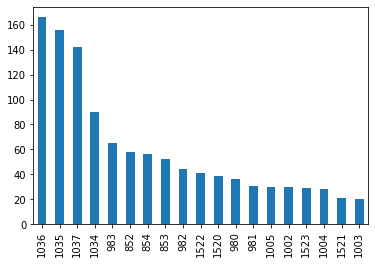

In [33]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

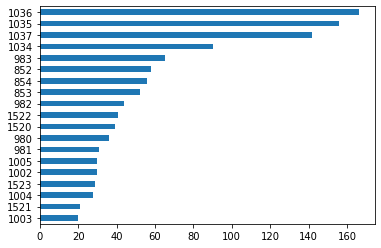

In [34]:
#Gráfico d barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

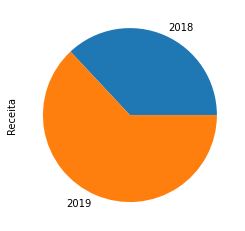

In [35]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [36]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        480
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

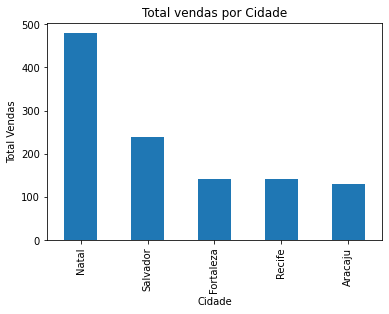

In [37]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

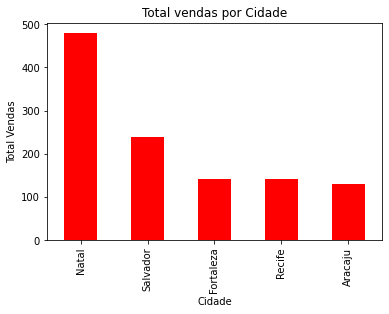

In [38]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [39]:
#Alterando estilo
plt.style.use("ggplot")

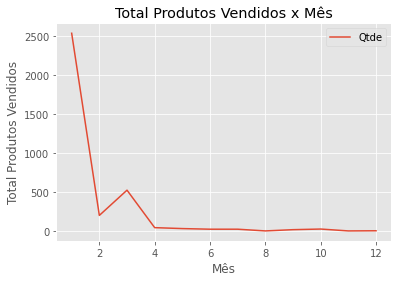

In [40]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [41]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2541
2      203
3      527
4       46
5       34
6       26
7       26
8        4
9       20
10      28
11       4
12       6
Name: Qtde, dtype: int64

In [42]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

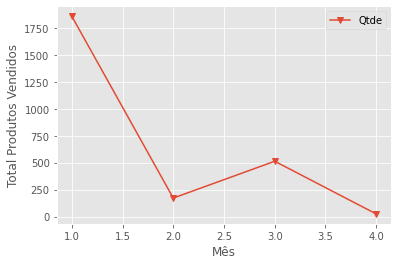

In [44]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

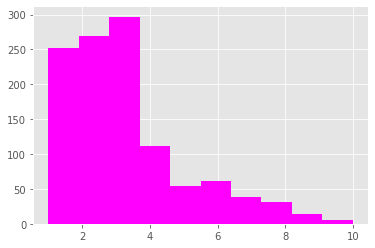

In [45]:
#Hisograma
plt.hist(df["Qtde"], color="magenta");

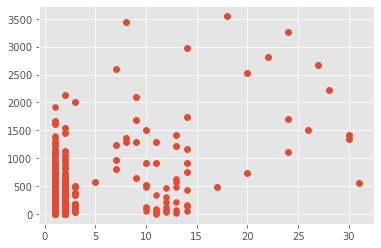

In [46]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

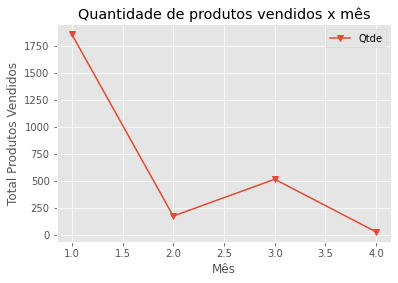

In [49]:
#Salvando em PNG
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")